In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


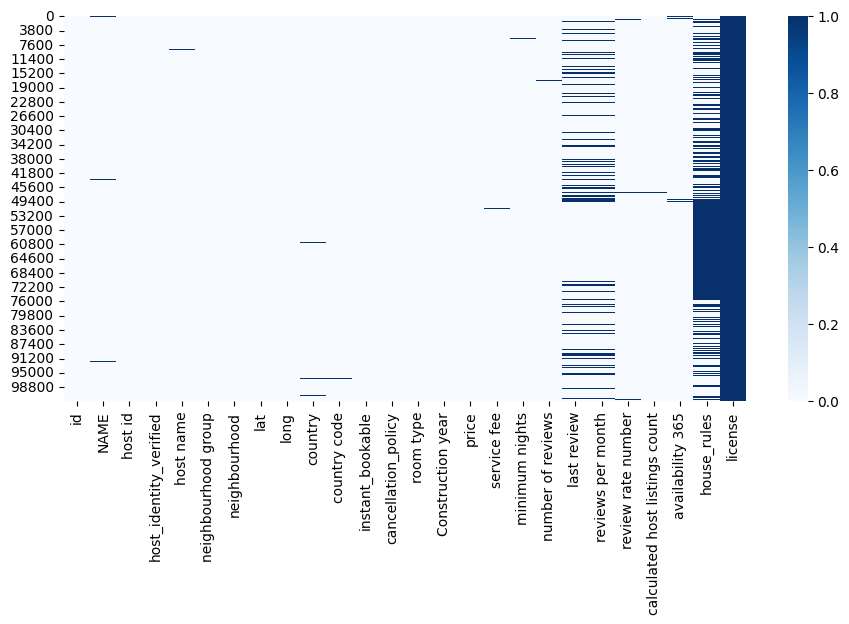

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [3]:
plt.figure(figsize=(11,5))
sns.heatmap(df.isna(),cmap='Blues')
plt.show()
print(df.isna().sum())

In [4]:

df.drop(['id','host id','license','house_rules','reviews per month','last review','host name','country code'],axis=1,inplace=True)


df.rename(columns={'NAME':'name','host_identity_verified':'host identity','Construction year':'construction year'},inplace=True)
df.head()

,name,host identity,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Manhattan,Harlem,40.80902,-73.94190,United States,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,1.0,352.0
3,NaN,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0


In [5]:
#kategorik ve sayısal ifadeleri bulma
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns

In [6]:
df.isnull().sum()

name                              250
host identity                     289
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
country                           532
instant_bookable                  105
cancellation_policy                76
room type                           0
construction year                 214
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

In [7]:
from sklearn.impute import KNNImputer

In [8]:
knn_imputer = KNNImputer(n_neighbors=5)  # n_neighbors: KNN'deki komşu sayısı

# Sayısal sütunların listesi 
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Eksik verileri KNN ile doldur
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

In [9]:

df['price']=df['price'].fillna(0)
df['service fee']=df['service fee'].fillna(0)

df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)
df['service fee'] = df['service fee'].replace({'\$': '', ',': ''}, regex=True)
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)

df.dtypes

name                               object
host identity                      object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
instant_bookable                   object
cancellation_policy                object
room type                          object
construction year                 float64
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

In [10]:
imputer=SimpleImputer(strategy='most_frequent')
df[cat_cols]=imputer.fit_transform(df[cat_cols])
df.isna().sum()

NameError: name 'SimpleImputer' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
df = df.drop(columns=categorical_cols)

In [ ]:
df.info()

In [ ]:
# Korelasyon matrisini hesaplayalım
corr_matrix = df.corr()

# Price sütunu ile ilişkileri gösteren ısı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['price_encoded']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Price Sütunu ile Diğer Değişkenler Arasındaki Korelasyon')
plt.show()

In [ ]:
# price ile bazı değişkenler arasındaki ilişki
num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols[num_cols != 'price_encoded']

# Alt grafik düzenini değiştirin
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # 3 sütunlu düzen, gerekli satır sayısını hesaplayın

plt.figure(figsize=(15, 5 * rows))  # Grafik boyutunu ayarlayın
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)  # 3 sütunlu düzen
    sns.scatterplot(data=df, x=col, y='price_encoded')  # 'price_encoded' yerine 'price' kullanın
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklenmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Örnek veri seti
# df = pd.read_csv('your_dataset.csv')  # Verinizi buraya yükleyin
# X = df.drop('target', axis=1)  # Özellikler
# y = df['target']  # Hedef değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri tanımlama
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Her bir model için çapraz doğrulama sonuçlarını hesaplama
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = np.mean(scores)

# En iyi performansı gösteren modeli bulma
best_model_name = max(results, key=results.get)
best_model_score = results[best_model_name]

print(f"En iyi model: {best_model_name}")
print(f"En iyi performans skoru: {best_model_score:.4f}")

# En iyi modeli tam eğitim verisiyle eğitme
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma ve skoru yazdırma
test_score = best_model.score(X_test, y_test)
print(f"Test verisi üzerindeki {best_model_name} skoru: {test_score:.4f}")

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Test verisi üzerindeki {best_model_name} MSE değeri: {mse:.4f}")